In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
from sklearn.svm import SVC

In [4]:
model=SVC()

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
from sklearn import metrics
predicted = model.predict(X_test)
expected = Y_test
print metrics.accuracy_score(expected,predicted)

0.973684210526


In [7]:
from sklearn import svm
X = iris.data[:,:2]
Y = iris.target

C = 1.0

In [8]:
svc = svm.SVC(C=C,kernel='linear').fit(X,Y)
rbf_svc = svm.SVC(C=C,kernel='rbf',gamma=0.7).fit(X,Y)
poly_svc = svm.SVC(C=C,kernel="poly",degree=3).fit(X,Y)
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [10]:
h = 0.02
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [11]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

In [21]:
np.c_[xx.ravel(),yy.ravel()]

array([[ 3.3 ,  1.  ],
       [ 3.32,  1.  ],
       [ 3.34,  1.  ],
       ..., 
       [ 8.84,  5.38],
       [ 8.86,  5.38],
       [ 8.88,  5.38]])

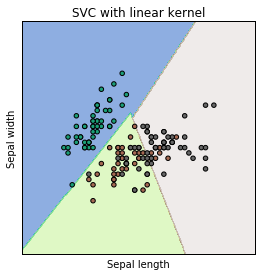

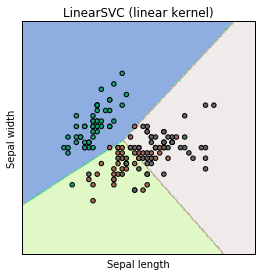

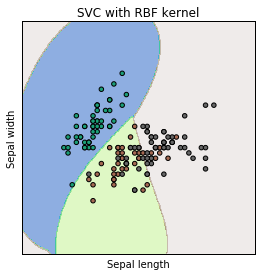

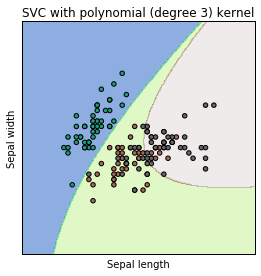

In [31]:
for i, clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace = 0.4, hspace =0.4)
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.terrain,alpha=0.5,linewidth=0)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])